### ASSIGNMENT 4
### Topic - Simple LInear Regression
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

### Q 1) Predict delivery time using sorting time 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("delivery_time.csv")  #Remove space from column names 
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.corr()    #Correlation matrix

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


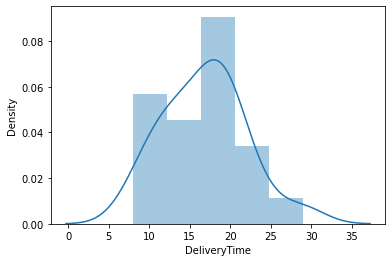

In [5]:
sns.distplot(data["DeliveryTime"]);

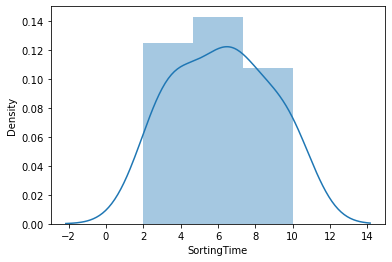

In [6]:
sns.distplot(data["SortingTime"]);

In [7]:
#1 importing necessary library
import statsmodels.formula.api as smf 

#2 Creating input and output variable
model = smf.ols("DeliveryTime~SortingTime",data=data).fit()

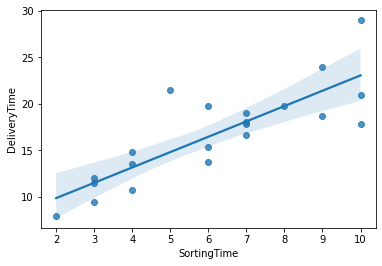

In [8]:
sns.regplot(y = "DeliveryTime",x = "SortingTime",data=data);   

In [9]:
model.params    #Parameters of linear regression equation

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [10]:
print(model.tvalues,"\n\n",model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 

 Intercept      0.001147
SortingTime    0.000004
dtype: float64


### as pvalue is less than 0.05 (alpha) ..The null hypothesis is rejected i.e B!= 0
### There is relation between Sorting Time and Delivery Time

In [11]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [12]:
#4 Prediction
ndata = pd.Series([5,6,3,8])
df = pd.DataFrame(ndata,columns =["SortingTime"])


In [13]:
df

,SortingTime
0,5
1,6
2,3
3,8


In [14]:
model.predict(df)

0    14.827833
1    16.476853
2    11.529794
3    19.774893
dtype: float64

### Steps to increase R squared value

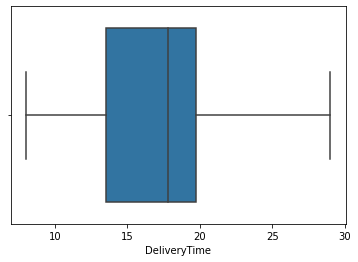

In [15]:
# Step 1 - Checking and removal of outliers

sns.boxplot(data["DeliveryTime"]);

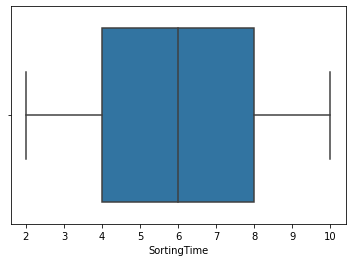

In [16]:
sns.boxplot(data["SortingTime"]);

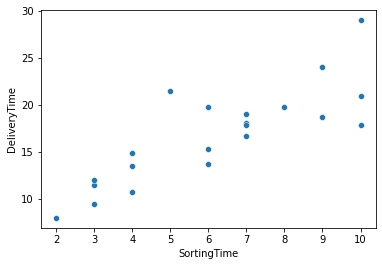

In [29]:
sns.scatterplot(x = "SortingTime",y = "DeliveryTime",data = data);

__ScatterPlot indicates wide spread of data__

__Boxplot indicates ABSENCE of outliers hence selecting different models to increase R squared value__

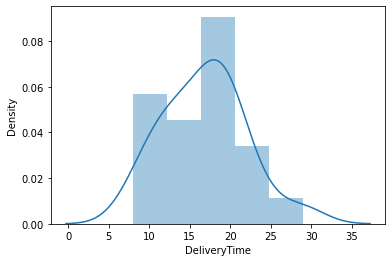

In [17]:
# Step 2 - Transforming Data(Log transformation)

data_log = np.log(data)
sns.distplot(data["DeliveryTime"]); #Checking the changes in distplot


In [18]:
model_log = smf.ols("DeliveryTime~SortingTime",data=data_log).fit()

In [19]:
(model_log.rsquared,model_log.rsquared_adj) 

(0.77216134926874, 0.7601698413355158)

__A significant increase in value of R squared is noted when log transformation is used__

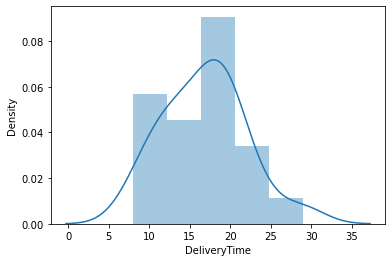

In [20]:
# Step 3 - Transforming Data(Square Root transformation)

data_sqrt = np.sqrt(data)
sns.distplot(data["DeliveryTime"]);


In [21]:
model_sqrt = smf.ols("DeliveryTime~SortingTime",data=data_sqrt).fit()

In [22]:
(model_sqrt.rsquared,model_sqrt.rsquared_adj) 

(0.7292011987544664, 0.7149486302678594)

__Log transformation is giving best R squared value.Hence going forward with log transformation__

### Final analysis

In [23]:
#Parameters
model_log.params

Intercept      1.741987
SortingTime    0.597522
dtype: float64

In [24]:
print(model_log.tvalues,"\n\n",model_log.pvalues)

Intercept      13.085552
SortingTime     8.024484
dtype: float64 

 Intercept      5.921137e-11
SortingTime    1.601539e-07
dtype: float64


In [25]:
(model_log.rsquared,model_log.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [38]:
# Using exponential for reverse transformation
ndata2 = np.exp(data_log)

In [39]:
model_log = smf.ols("DeliveryTime~SortingTime",ndata2).fit()

In [40]:
#4 Prediction
ndata = pd.Series([5,6,3,8])
df = pd.DataFrame(ndata,columns =["SortingTime"])
model_log.predict(np.log(df))

0     9.236729
1     9.537381
2     8.394367
3    10.011774
dtype: float64

### Q 2) Build a prediction model for Salary_hike

In [82]:
import pandas as pd
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [84]:
data.shape   # NO null data is present

(30, 2)

In [85]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


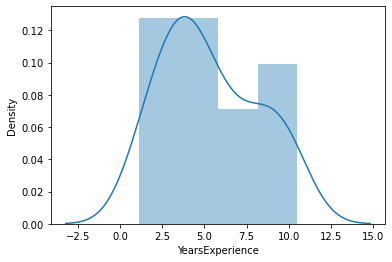

In [86]:
sns.distplot(data["YearsExperience"]);

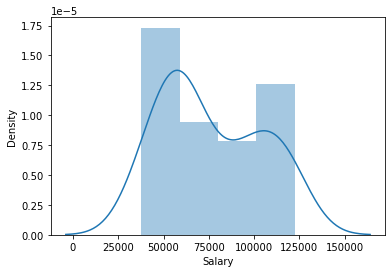

In [87]:
sns.distplot(data["Salary"]);

In [88]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=data).fit()
model

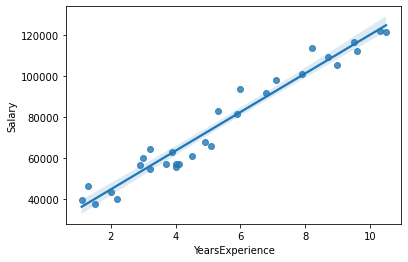

In [89]:
sns.regplot(y="Salary",x="YearsExperience",data=data);

In [90]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [91]:
print(model.tvalues,"\n\n",model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


### as pvalue is less than 0.05 (alpha) ..The null hypothesis is rejected i.e B != 0
### There is relation between Salary and YearsExperience

In [92]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [93]:
ndata = pd.Series([3.1,10.9,6.9])
df = pd.DataFrame(ndata,columns = ["YearsExperience"])
df

,YearsExperience
0,3.1
1,10.9
2,6.9


In [94]:
model.predict(df)

0     55087.083395
1    128796.789503
2     90996.940217
dtype: float64

### Steps to increase R squared value

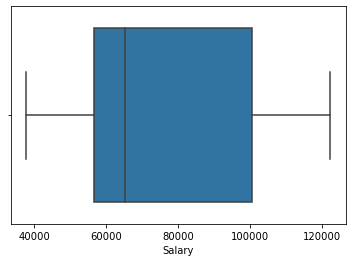

In [95]:
# Step 1 - Checking and removal of outliers

sns.boxplot(data["Salary"]);

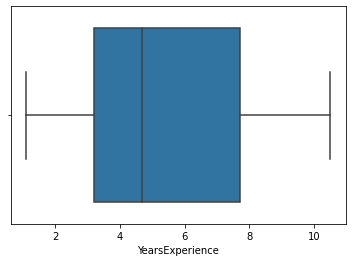

In [96]:

sns.boxplot(data["YearsExperience"]);

__No presence of outliers. Hence moving towards transformations__

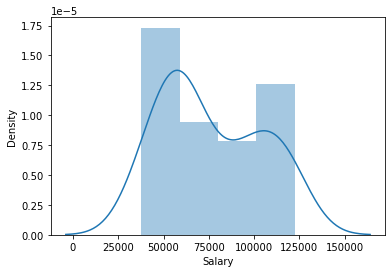

In [97]:
# Step 2 - Transformation (Choosing log transformation)
data_log = np.log(data)
sns.distplot(data['Salary']);

In [98]:
model_log = smf.ols("Salary~YearsExperience",data=data_log).fit()

In [99]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

__R squared value remains unchanged with transformation hence no need to do further changes__